# Modelos de ML basados en árboles de decisión

### 1- Arboles de clasificacion 

Responden una secuencia de preguntas si o no

Pueden capturar relaciones no lineales

No necesitan que los datos esten en la misma escala (no hay que aplicar estandarización)

El Maximo de ramas que separa el primer nodo del mas lejano es el maimo de profundidad del árbol

Consisten en una jerarquia de nodos. Cada nodo puede ser una predicción o una pregunta

La raiz (root) es el nodo donde empieza el árbol, no tiene ningun nodo padre y hace una pregunta que crea dos nodos hijos

Los nodos internos (internal) tienen un padre y hacen una pregunta que crea dos nuevos hijos nodos

Un nodo que no tiene hijos y si tienen un padre se conoce como hoja (leaf)

En cada nodo se separa la data basandose en una feature y un split-point, siempre tratando de maximizar la obtencion de informacion (IG: Information Gain). Si IG=0 el nodo se declara una hoja (leaf)

#### 1.1- Entrenemos un árbol de clasificacion

In [1]:
import pandas as pd

# Traemos los datos
wbc = pd.read_csv("datasets/MLTreeModels/wbc.csv")

print(list(wbc.columns))

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [2]:
wbc[['diagnosis', "radius_mean", "concave points_mean"]].head()

,diagnosis,radius_mean,concave points_mean
0,M,17.99,0.14710
1,M,20.57,0.07017
2,M,19.69,0.12790
3,M,11.42,0.10520
4,M,20.29,0.10430


In [3]:
print(wbc['diagnosis'].unique())

# Reemplazamos por 1 y 0
wbc['diagnosis'] = wbc['diagnosis'].replace(['M', 'B'], [1, 0])

['M' 'B']


In [4]:
X = wbc[["radius_mean", "concave points_mean"]]
y = wbc[["diagnosis"]]

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividimos la data en conjunto de entrenamiento y testeo
# con stratify y estamos pidiendo que la proporcion en el
# conjunto de testeo sea la misma que en el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

In [6]:
dt = DecisionTreeClassifier(max_depth=8, random_state=1, criterion="gini")

# Ajustamos el modelo
dt.fit(X_train, y_train)

# Predicimos
y_pred = dt.predict(X_test)

# Evaluamos
score = accuracy_score(y_test, y_pred)
print("decision tree score", score)

decision tree score 0.9210526315789473


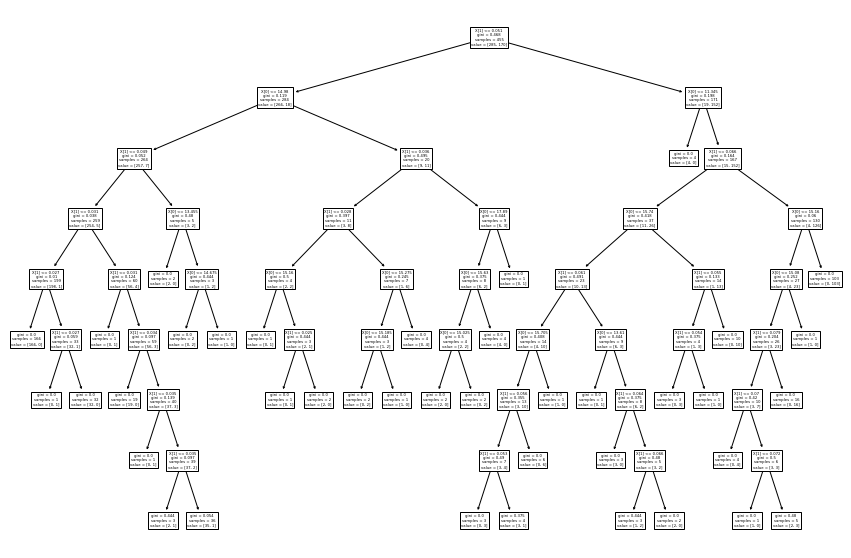

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
plot_tree(dt, ax=ax)
plt.show()

Entrenando con un modelo Logit

In [8]:
from sklearn.linear_model import  LogisticRegression

logreg = LogisticRegression(random_state=1)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Logit score", score)

C:\Users\pamel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Logit score 0.8859649122807017


#### 1.2- Entrenemos un árbol de regresión

En este caso la variable a predecir es continua

Usamos de ejemplo el dataset de millas por galon de UCI Machine Learning Repository

In [12]:
# Leemos el dataset
auto_df = pd.read_csv("datasets/MLTreeModels/auto.csv")
auto_df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


El dataset muestra las caracteristicas de un auto y la variable continua que buscamos modelar es mpg (miles per galon)

Veamos como se relaciona mpg (consumo) con displ (cilindrada)

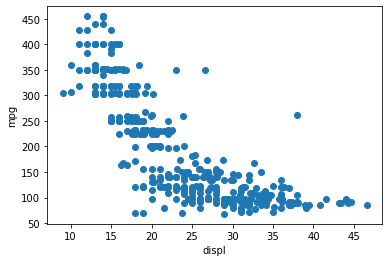

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(auto_df["mpg"], auto_df["displ"])
ax.set_xlabel("displ")
ax.set_ylabel("mpg")
plt.show()

Como la relacion no parece linear, sabemos que un modelo de regresion linial tipico no sería capaz de capturar la relación

Separamos los datos para poder entrenar

In [15]:
X = auto_df[["displ"]]
y = auto_df[["mpg"]]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=3)

Creamos el árbol

In [21]:
from sklearn.tree import DecisionTreeRegressor

# El parametro min_set_leaf impone que cada hoja (leaf) debe
# contener el 10% de los datos
dt = DecisionTreeRegressor(max_depth=4, random_state=3,
                           min_samples_leaf=0.1)


In [25]:
import numpy as np

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

rmse_dt = np.sqrt(MSE(y_pred, y_test))

print("El RMSE del árbol es: ", rmse_dt)

El RMSE del árbol es:  5.102306888903137


In [26]:
y_pred

array([26.22439024, 32.98780488, 15.06470588, 32.98780488, 32.98780488,
       19.64464286, 26.22439024, 25.0275    , 15.06470588, 19.64464286,
       14.        , 26.22439024, 25.0275    , 15.06470588, 19.64464286,
       25.0275    , 15.06470588, 29.94210526, 29.94210526, 19.64464286,
       19.64464286, 19.64464286, 15.06470588, 32.98780488, 26.22439024,
       14.        , 25.0275    , 26.22439024, 19.64464286, 26.22439024,
       29.94210526, 26.22439024, 32.98780488, 32.98780488, 32.98780488,
       19.64464286, 32.98780488, 14.        , 14.        , 29.94210526,
       15.06470588, 19.64464286, 32.98780488, 25.0275    , 15.06470588,
       14.        , 14.        , 19.64464286, 19.64464286, 19.64464286,
       14.        , 26.22439024, 14.        , 25.0275    , 25.0275    ,
       32.98780488, 19.64464286, 29.94210526, 25.0275    , 15.06470588,
       14.        , 26.22439024, 32.98780488, 26.22439024, 32.98780488,
       32.98780488, 19.64464286, 19.64464286, 19.64464286, 14.  

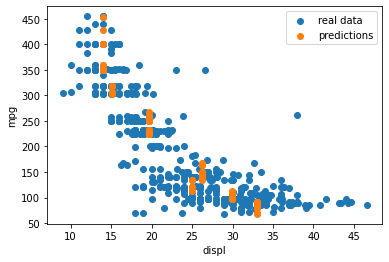

In [30]:
fig, ax = plt.subplots()
ax.scatter(auto_df["mpg"], auto_df["displ"], label="real data")
ax.scatter(y_pred, X_test, label="predictions")
ax.set_xlabel("displ")
ax.set_ylabel("mpg")
ax.legend()
plt.show()